<a href="https://colab.research.google.com/github/Rodzeymer/Imersao_Python/blob/main/Imers%C3%A3o_Python_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Primeiramente importamos as bibliotecas que vamos usar nesse dia

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [89]:
# Fazemos o donwload da base de dados, desta vez da Johnson e Johnson

dados = yf.download("JNJ", start="2023-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

In [90]:
# Vamos dividir os dados em dados de treino e dados de teste, os dados de treinos serão usados para treinar o
# Prophet para que ele possa fazer uma previsão dos preços das ações após o dia 31-07 e os dados de teste é
# para testar a previsão, verificar o quanto a presvisão está errada

dados_treino = dados[dados["Date"]<"2023-07-31"]
dados_teste = dados[dados["Date"]>="2023-07-31"]

In [91]:
# Por padrão temos que renomear as colunas Date e Close em ds e y

dados_prophet_treino = dados_treino[["Date", "Close"]].rename(columns={"Date":"ds", "Close": "y"})
dados_prophet_treino

,ds,y
0,2023-01-03,178.190002
1,2023-01-04,180.130005
2,2023-01-05,178.800003
3,2023-01-06,180.250000
4,2023-01-09,175.580002
...,...,...
138,2023-07-24,171.080002
139,2023-07-25,172.389999
140,2023-07-26,172.720001
141,2023-07-27,173.690002


In [92]:
# Agora vamos instanciar o modelo, criar um espécime do modelo de previsão e configurá-lo, com
# as sazonalidades anuais, semanais e diáiras, nesse caso, solicitando que as sazonalidades
# semanais e anuais sejam consideradas, mas não as diárias.

# Solicitamos que o modelo considere os feriados, nesse caso, nos feriados dos Estados Unidos.

# E treinamos o modelo com os dados de treino.

modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name="US")

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd9n_x58_/7auxczrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd9n_x58_/1a8s6eo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13456', 'data', 'file=/tmp/tmpd9n_x58_/7auxczrk.json', 'init=/tmp/tmpd9n_x58_/1a8s6eo4.json', 'output', 'file=/tmp/tmpd9n_x58_/prophet_modelqxhxejcf/prophet_model-20240331182344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [93]:
# Agora pegamos o modelo e solicitamos que ele faça uma previsão dos próximos 150 dias.
# E o modelo nos faz a previsão dessa quantidade de dados.

futuro = modelo.make_future_dataframe(periods=153)
previsao = modelo.predict(futuro)

In [94]:
# PREVISÃO!

previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-03,170.530920,177.355247,181.254910,170.530920,170.530920,0.0,0.0,0.0,0.0,...,-1.749254,-1.749254,-1.749254,10.590023,10.590023,10.590023,0.0,0.0,0.0,179.371689
1,2023-01-04,170.501061,176.933762,181.182163,170.501061,170.501061,0.0,0.0,0.0,0.0,...,-1.643852,-1.643852,-1.643852,10.280879,10.280879,10.280879,0.0,0.0,0.0,179.138088
2,2023-01-05,170.471201,176.961422,180.850964,170.471201,170.471201,0.0,0.0,0.0,0.0,...,-1.382162,-1.382162,-1.382162,9.881359,9.881359,9.881359,0.0,0.0,0.0,178.970398
3,2023-01-06,170.441342,176.609312,180.713026,170.441342,170.441342,0.0,0.0,0.0,0.0,...,-1.215154,-1.215154,-1.215154,9.402939,9.402939,9.402939,0.0,0.0,0.0,178.629127
4,2023-01-09,170.351764,174.534224,178.538440,170.351764,170.351764,0.0,0.0,0.0,0.0,...,-1.421199,-1.421199,-1.421199,7.618804,7.618804,7.618804,0.0,0.0,0.0,176.549369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2023-12-24,159.930838,168.860472,172.631091,159.930831,159.930846,0.0,0.0,0.0,0.0,...,3.705812,3.705812,3.705812,7.116674,7.116674,7.116674,0.0,0.0,0.0,170.753324
292,2023-12-25,159.900979,164.544282,168.518138,159.900971,159.900986,0.0,0.0,0.0,0.0,...,-1.421199,-1.421199,-1.421199,7.987565,7.987565,7.987565,0.0,0.0,0.0,166.467345
293,2023-12-26,159.871119,164.962864,168.899844,159.871112,159.871127,0.0,0.0,0.0,0.0,...,-1.749254,-1.749254,-1.749254,8.759253,8.759253,8.759253,0.0,0.0,0.0,166.881119
294,2023-12-27,159.841260,165.482410,169.582150,159.841252,159.841268,0.0,0.0,0.0,0.0,...,-1.643852,-1.643852,-1.643852,9.421335,9.421335,9.421335,0.0,0.0,0.0,167.618743


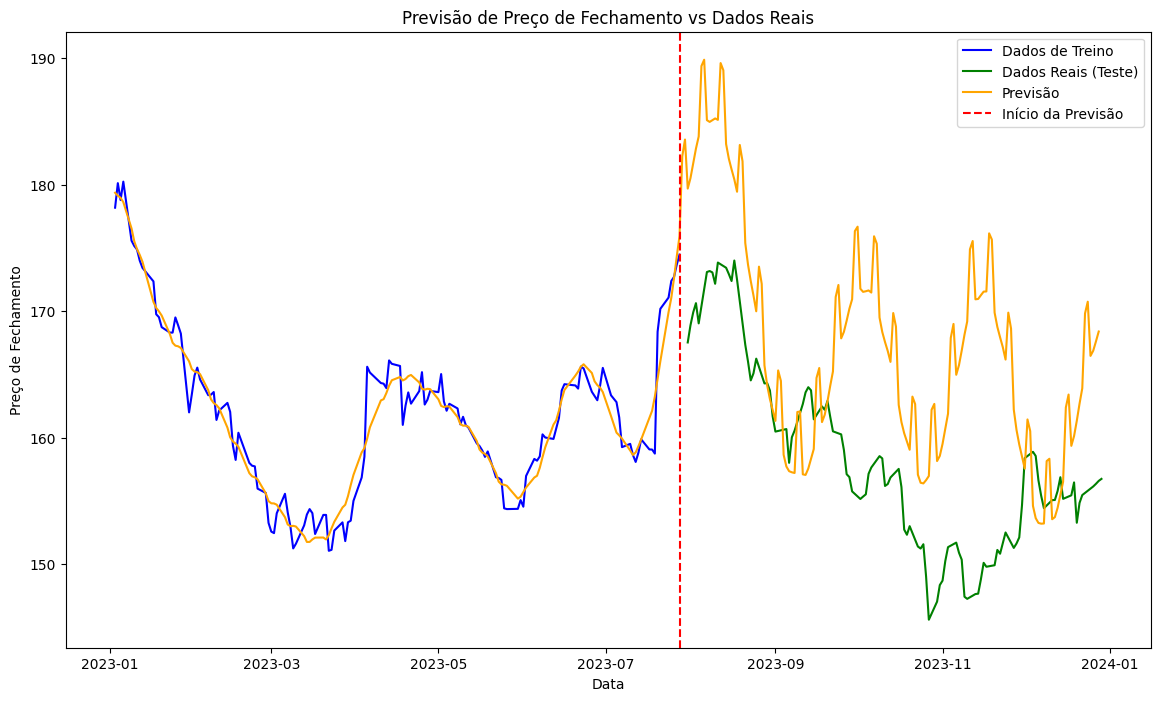

In [95]:
# Plotamos os dados em um gráfico, em azul os dados de treino e em verde os dados reais
# que deve, se tudo der certo, acompanhar a linha dos dados reais.

plt.figure(figsize=(14,8))

plt.plot(dados_treino["Date"], dados_treino["Close"], label="Dados de Treino", color="blue")
plt.plot(dados_teste["Date"], dados_teste["Close"], label="Dados Reais (Teste)", color="green")
plt.plot(previsao["ds"], previsao["yhat"], label="Previsão", color="orange")

plt.axvline(dados_treino["Date"].max(), color="red", linestyle="--", label="Início da Previsão")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.title("Previsão de Preço de Fechamento vs Dados Reais")
plt.legend()
plt.show()

E pronto, é o começo do machine learning, nos ajudando a fazer previsões, previsões simples, mas já é o começo de previsões.